In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### [Problem 1] K-means Clustering

In [521]:
df1 = {'ID': [1,2,3,4,5,6,7],
        'X': [3,5,6,4,4,7,8],
        'y': [4,3,4,5,7,6,4],
        'Cluster': ['Cluster 1','Cluster 1','Cluster 1', 'Cluster 2','Cluster 2','Cluster 2','Cluster 2']}

kdf = pd.DataFrame(df1)

kdf.head(7)

,ID,X,y,Cluster
0,1,3,4,Cluster 1
1,2,5,3,Cluster 1
2,3,6,4,Cluster 1
3,4,4,5,Cluster 2
4,5,4,7,Cluster 2
5,6,7,6,Cluster 2
6,7,8,4,Cluster 2


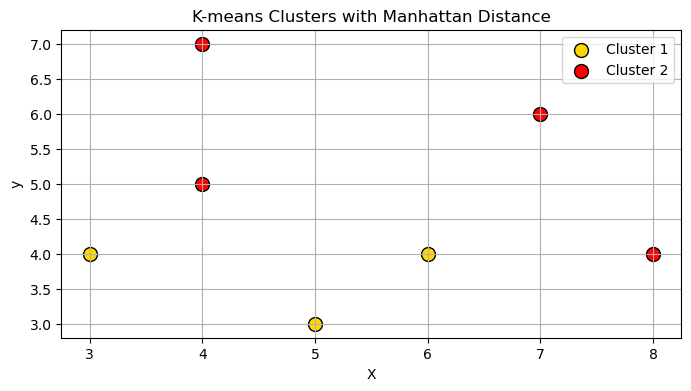

In [523]:
colors = {'Cluster 1': 'gold', 'Cluster 2': 'red'}

plt.figure(figsize=(8,4))
for cluster, color in colors.items():
    subset = kdf[kdf['Cluster'] == cluster]
    plt.scatter(subset['X'], subset['y'], label=cluster, color=color, s=100, edgecolor='k')

plt.xlabel('X')
plt.ylabel('y')
plt.title('K-means Clusters with Manhattan Distance')
plt.legend()
plt.grid(True)
plt.show()

In [525]:
#compute centroid for each cluster
def centroid(df):
    return np.median(df[['X','y']].values, axis=0)

centroid_clus1 = centroid(kdf[kdf['Cluster']=='Cluster 1'])
centroid_clus2 = centroid(kdf[kdf['Cluster']=='Cluster 2'])

In [527]:
#calculating manhattan distance
def manhattan_distance(row, centroid):
    return abs(row['X']-centroid[0]) + abs(row['y']-centroid[1])

#assign each object to nearest centroid cluster
def assign_object(row):
    d1 = manhattan_distance(row, centroid_clus1)
    d2 = manhattan_distance(row, centroid_clus2)

    if d1 <= d2:
        return "Cluster 1"
    else:
        return "Cluster 2"

In [529]:
kdf['Cluster'] = kdf.apply(assign_object, axis=1)
kdf = pd.DataFrame(kdf)
kdf.head(7)

,ID,X,y,Cluster
0,1,3,4,Cluster 1
1,2,5,3,Cluster 1
2,3,6,4,Cluster 1
3,4,4,5,Cluster 1
4,5,4,7,Cluster 2
5,6,7,6,Cluster 2
6,7,8,4,Cluster 1


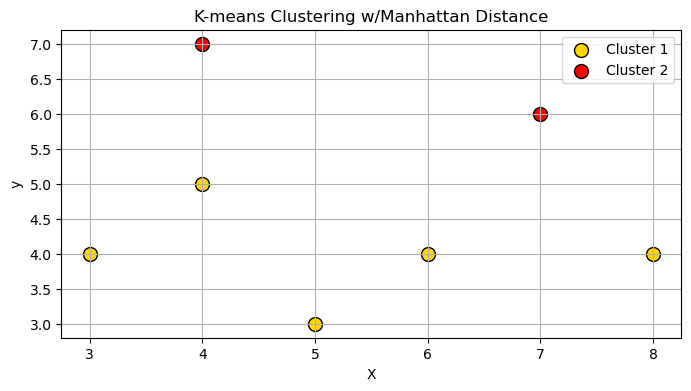

In [531]:
colors = {'Cluster 1': 'gold', 'Cluster 2': 'red'}

plt.figure(figsize=(8,4))
for cluster, color in colors.items():
    subset = kdf[kdf['Cluster'] == cluster]
    plt.scatter(subset['X'], subset['y'], label=cluster, color=color, s=100, edgecolor='k')

plt.xlabel('X')
plt.ylabel('y')
plt.title('K-means Clustering w/Manhattan Distance')
plt.legend()
plt.grid(True)
plt.show()

##### [Problem 2] Distance b/w Clusters

In [533]:
df2 = {'ID': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
        'X': [2,3,3,4,6,7,8],
        'y': [4,6,2,3,4,2,5],
        'Cluster': ['Cluster 1','Cluster 1','Cluster 1', 'Cluster 1', 'Cluster 2','Cluster 2','Cluster 2']}

distdf = pd.DataFrame(df2)
distdf.head(10)

,ID,X,y,Cluster
0,a,2,4,Cluster 1
1,b,3,6,Cluster 1
2,c,3,2,Cluster 1
3,d,4,3,Cluster 1
4,e,6,4,Cluster 2
5,f,7,2,Cluster 2
6,g,8,5,Cluster 2


In [535]:
#splitting the clusters
clust1 = distdf[distdf['Cluster']=='Cluster 1'][['X','y']].values
clust2 = distdf[distdf['Cluster']=='Cluster 2'][['X','y']].values

clust1, clust2

(array([[2, 4],
        [3, 6],
        [3, 2],
        [4, 3]]),
 array([[6, 4],
        [7, 2],
        [8, 5]]))

##### Maximum Distance w/Manhattan Distance

In [538]:
max_distance = 0
for xy_val1 in clust1:
    for xy_val2 in clust2:
        distance = np.abs(xy_val1[0] - xy_val2[0]) + np.abs(xy_val1[1] - xy_val2[1])
        if distance > max_distance:
            max_distance = distance

print("Maximum Manhattan distance between clusters:", max_distance)

Maximum Manhattan distance between clusters: 8


##### Centroid Distance w/Manhattan Distance

In [541]:
centroid1 = np.mean(clust1, axis=0)
centroid2 = np.mean(clust2, axis=0)

centroid_distance = np.abs(centroid1[0] - centroid2[0]) + np.abs(centroid1[1] - centroid2[1])

print("Manhattan distance between centroids:", centroid_distance)

Manhattan distance between centroids: 4.083333333333334


##### [Problem 3]

In [544]:
#pip install pydataset

In [546]:
from pydataset import data
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [548]:
#confirming it has 47 observations and 6 features
swiss.shape

(47, 6)

In [550]:
swiss.info() #all numeric columns

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [552]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### [Problem 3.1] Apply k-means clustering to the data

In [555]:
#standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(swiss)

#elbow method
total_sse = []

for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans_model.fit(scaled)
    total_sse.append(kmeans_model.inertia_)

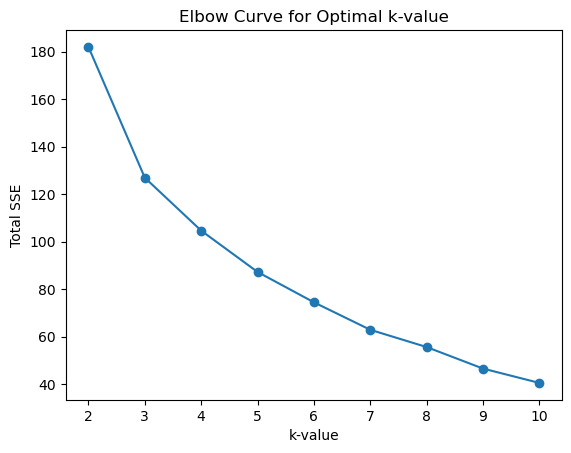

In [557]:
#plot the elbow curve
plt.plot(range(2,11), total_sse, marker='o')
plt.xlabel('k-value')
plt.ylabel('Total SSE')
plt.title('Elbow Curve for Optimal k-value')
plt.show()

In [559]:
#built table for sse, marginal gain, and gain % of first
sse_tbl = pd.DataFrame({
    'k': range(2, 11),
    'SSE': total_sse
})

sse_tbl['gain'] = sse_tbl['SSE'].shift(1) - sse_tbl['SSE']
base_gain = sse_tbl['gain'].iloc[1]

sse_tbl['gain_percent'] = round(100*sse_tbl['gain']/base_gain, 2)
print(sse_tbl)

    k         SSE       gain  gain_percent
0   2  182.016458        NaN           NaN
1   3  126.905260  55.111198        100.00
2   4  104.612432  22.292828         40.45
3   5   87.204563  17.407869         31.59
4   6   74.420363  12.784200         23.20
5   7   62.837771  11.582592         21.02
6   8   55.567280   7.270491         13.19
7   9   46.493981   9.073299         16.46
8  10   40.450529   6.043452         10.97


##### [Problem 3.2] Association

In [562]:
#fitting k means model with k=3
kmeans_model2 = KMeans(n_clusters=3, n_init=25, random_state=42)
swiss['Cluster'] = kmeans_model2.fit_predict(scaled)

swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,Cluster
Courtelary,80.2,17.0,15,12,9.96,22.2,1
Delemont,83.1,45.1,6,9,84.84,22.2,2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,2
Moutier,85.8,36.5,12,7,33.77,20.3,1
Neuveville,76.9,43.5,17,15,5.16,20.6,1


In [564]:
#compare cluster means
cluster_mean = swiss.groupby('Cluster')[['Examination', 'Education']].mean()
print(cluster_mean)

         Examination  Education
Cluster                        
0          27.625000  27.625000
1          17.521739   8.217391
2           9.437500   6.625000


In [566]:
#the cluster with highest mean in both
best_cluster = cluster_mean[(cluster_mean['Examination'] == cluster_mean['Examination'].max()) &
                            (cluster_mean['Education'] == cluster_mean['Education'].max())].index.tolist()
if not best_cluster:
    best_cluster = cluster_mean[(cluster_mean['Examination'] == cluster_mean['Examination'].max()) |
                            (cluster_mean['Education'] == cluster_mean['Education'].max())].index.tolist()

print(f"Cluster(s) with high Examination and/or high Education: {best_cluster}")

Cluster(s) with high Examination and/or high Education: [0]


In [568]:
for c in best_cluster:
    provinces = swiss[swiss['Cluster'] == c].index.tolist()
    print(f"Provinces in cluster {c}: {provinces}")

Provinces in cluster 0: ['Lausanne', 'La Vallee', 'Vevey', 'La Chauxdfnd', 'Neuchatel', 'V. De Geneve', 'Rive Droite', 'Rive Gauche']


##### [Problem 4] Agglomerative Hierarchical Clustering Approach 

/var/folders/8y/_nxp_0_n50q0qqq5tr00vwsr0000gn/T/ipykernel_69486/1491153568.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


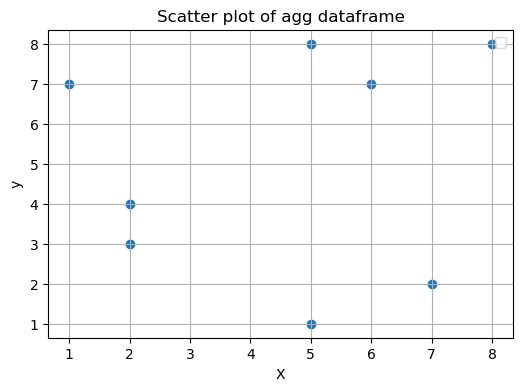

In [575]:
df3 = {'Object': ['a','b','c','d','e','f','g','h'],
        'X': [1,2,2,5,5,6,7,8],
        'y': [7,3,4,1,8,7,2,8]}

agg = pd.DataFrame(df3)

plt.figure(figsize=(6,4))
plt.scatter(agg['X'],agg['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of agg dataframe')
plt.legend()
plt.grid(True)
plt.show()

In [577]:
xy_points = list(zip(agg['X'], agg['y']))
object_label = agg['Object'].tolist()

print(xy_points)
print(object_label)

[(1, 7), (2, 3), (2, 4), (5, 1), (5, 8), (6, 7), (7, 2), (8, 8)]
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


In [579]:
total_clusters = []
for i in range(len(xy_points)):
    total_clusters.append([i])

cluster_objects = []
for i in range(len(xy_points)):
    cluster_objects.append([object_label[i]])

print(f"Initially, there are {len(total_clusters)} clusters:")
for index, clus in enumerate(cluster_objects):
    print(f"  Cluster {index+1}: {clus}")

Initially, there are 8 clusters:
  Cluster 1: ['a']
  Cluster 2: ['b']
  Cluster 3: ['c']
  Cluster 4: ['d']
  Cluster 5: ['e']
  Cluster 6: ['f']
  Cluster 7: ['g']
  Cluster 8: ['h']


In [581]:
#finding minimum distance through manhattan distance
def manhattan_distance(p1, p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

In [583]:
step = 1
while len(total_clusters)>1:
    min_dist = float('inf')
    to_merge = (None, None)

    for i in range(len(total_clusters)):
        for j in range(i+1, len(total_clusters)):
            min_pair_dist = float('inf')
            for p1 in total_clusters[i]:
                for p2 in total_clusters[j]:
                    dist = manhattan(xy_points[p1], xy_points[p2])
                    if dist < min_pair_dist:
                        min_pair_dist = dist
            if min_pair_dist < min_dist:
                min_dist = min_pair_dist
                to_merge = (i, j)

    i, j = to_merge
    new_cluster = []
    for index in total_clusters[i]:
        new_cluster.append(index)

    for index in total_clusters[j]:
        new_cluster.append(index)

    new_objects = []
    for obj in cluster_objects[i]:
        new_objects.append(obj)

    for obj in cluster_objects[j]:
        new_objects.append(obj)

    print(f"Step {step}: Merge clusters {cluster_objects[i]} and {cluster_objects[j]} (distance = {min_dist})")

    new_total_clusters = []
    for k in range(len(total_clusters)):
        if k != i and k != j:
            new_total_clusters.append(total_clusters[k])
    new_total_clusters.append(new_cluster)
    total_clusters = new_total_clusters

    new_cluster_objects = []
    for k in range(len(cluster_objects)):
        if k != i and k != j:
            new_cluster_objects.append(cluster_objects[k])
    new_cluster_objects.append(new_objects)
    cluster_objects = new_cluster_objects

    for idx, clus in enumerate(cluster_objects):
        print(f"  Cluster {idx+1}: {clus}")
    print("\n")
    step += 1

Step 1: Merge clusters ['b'] and ['c'] (distance = 1)
  Cluster 1: ['a']
  Cluster 2: ['d']
  Cluster 3: ['e']
  Cluster 4: ['f']
  Cluster 5: ['g']
  Cluster 6: ['h']
  Cluster 7: ['b', 'c']


Step 2: Merge clusters ['e'] and ['f'] (distance = 2)
  Cluster 1: ['a']
  Cluster 2: ['d']
  Cluster 3: ['g']
  Cluster 4: ['h']
  Cluster 5: ['b', 'c']
  Cluster 6: ['e', 'f']


Step 3: Merge clusters ['d'] and ['g'] (distance = 3)
  Cluster 1: ['a']
  Cluster 2: ['h']
  Cluster 3: ['b', 'c']
  Cluster 4: ['e', 'f']
  Cluster 5: ['d', 'g']


Step 4: Merge clusters ['h'] and ['e', 'f'] (distance = 3)
  Cluster 1: ['a']
  Cluster 2: ['b', 'c']
  Cluster 3: ['d', 'g']
  Cluster 4: ['h', 'e', 'f']


Step 5: Merge clusters ['a'] and ['b', 'c'] (distance = 4)
  Cluster 1: ['d', 'g']
  Cluster 2: ['h', 'e', 'f']
  Cluster 3: ['a', 'b', 'c']


Step 6: Merge clusters ['d', 'g'] and ['a', 'b', 'c'] (distance = 5)
  Cluster 1: ['h', 'e', 'f']
  Cluster 2: ['d', 'g', 'a', 'b', 'c']


Step 7: Merge cluster

##### [Problem 5] Time Series

In [586]:
airpass = data('AirPassengers')
airpass.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


In [588]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1 to 144
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           144 non-null    float64
 1   AirPassengers  144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.4 KB


##### [5.1] Time series Plot

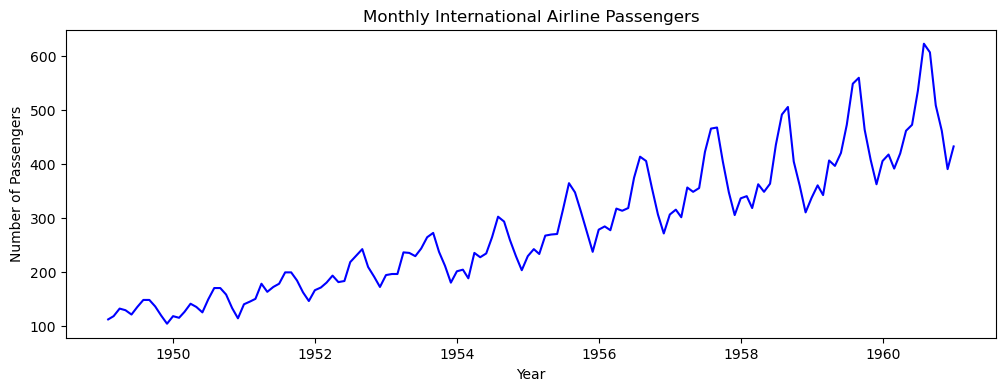

In [591]:
airpass['Month'] = pd.date_range(start='1949-01', periods=len(airpass), freq='ME')
airpass.set_index('Month', inplace=True)

plt.figure(figsize=(12, 4))
plt.plot(airpass.index, airpass['AirPassengers'], color='blue')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

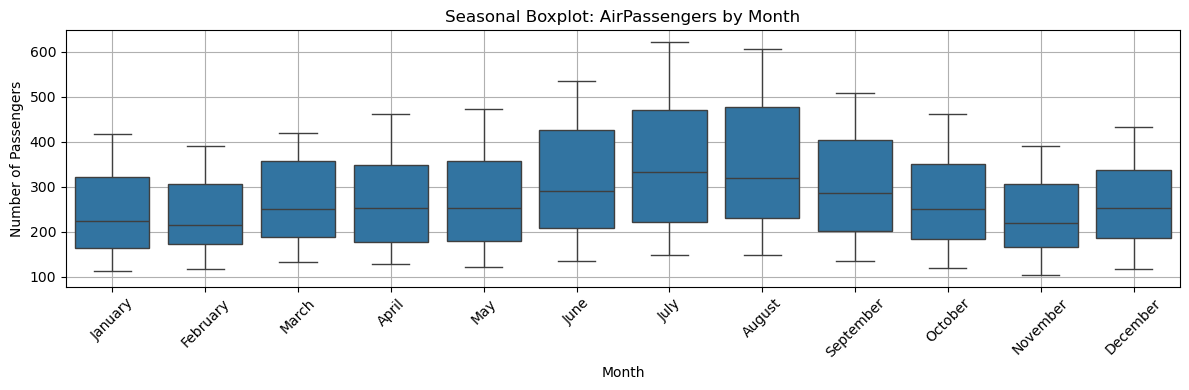

In [593]:
# Convert to datetime index
airpass['Month'] = pd.date_range(start='1949-01', periods=len(airpass), freq='ME')
airpass['year'] = airpass['Month'].dt.year
airpass['month'] = airpass['Month'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 4))
sns.boxplot(x='month', y='AirPassengers', data=airpass, order=month_order)
plt.title('Seasonal Boxplot: AirPassengers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### [5.3] 2 Regression-based Forecasts

In [596]:
airpass['Month'] = pd.date_range(start='1949-01', periods=len(airpass), freq='ME')
airpass.set_index('Month', inplace=True)

train= airpass[airpass['year']<1960]['AirPassengers']
test = airpass[airpass['year']==1960]['AirPassengers']

##### Model 1: Linear Regression w/Trend and Seasonality

In [599]:
from sklearn.linear_model import LinearRegression

train_df = train.reset_index()
train_df['trend'] = np.arange(len(train_df))
train_df['month'] = train_df['Month'].dt.month

test_df = test.reset_index()
test_df['trend'] = np.arange(len(train_df), len(train_df) + len(test_df))
test_df['month'] = test_df['Month'].dt.month

train_df.head()

,Month,AirPassengers,trend,month
0,1949-01-31,112,0,1
1,1949-02-28,118,1,2
2,1949-03-31,132,2,3
3,1949-04-30,129,3,4
4,1949-05-31,121,4,5


In [601]:
test_df.head()

,Month,AirPassengers,trend,month
0,1960-01-31,417,132,1
1,1960-02-29,391,133,2
2,1960-03-31,419,134,3
3,1960-04-30,461,135,4
4,1960-05-31,472,136,5


In [603]:
X_train = pd.get_dummies(train_df[['trend', 'month']], columns=['month'])
X_test = pd.get_dummies(test_df[['trend', 'month']], columns=['month'])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

y_train = train_df['AirPassengers']
y_test = test_df['AirPassengers']

In [605]:
#fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#predict model
lr_pred = lr_model.predict(X_test)

In [607]:
#coefficient values bo and b1
intercept_bo = lr_model.intercept_
trend_b1 = lr_model.coef_[0]

#calculating error (actual-expected)
errors = y_test - lr_pred
rmse = mean_squared_error(y_test, lr_pred, squared=False)

# Prepare a summary table
summary_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': lr_pred,
    'Error': errors
})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


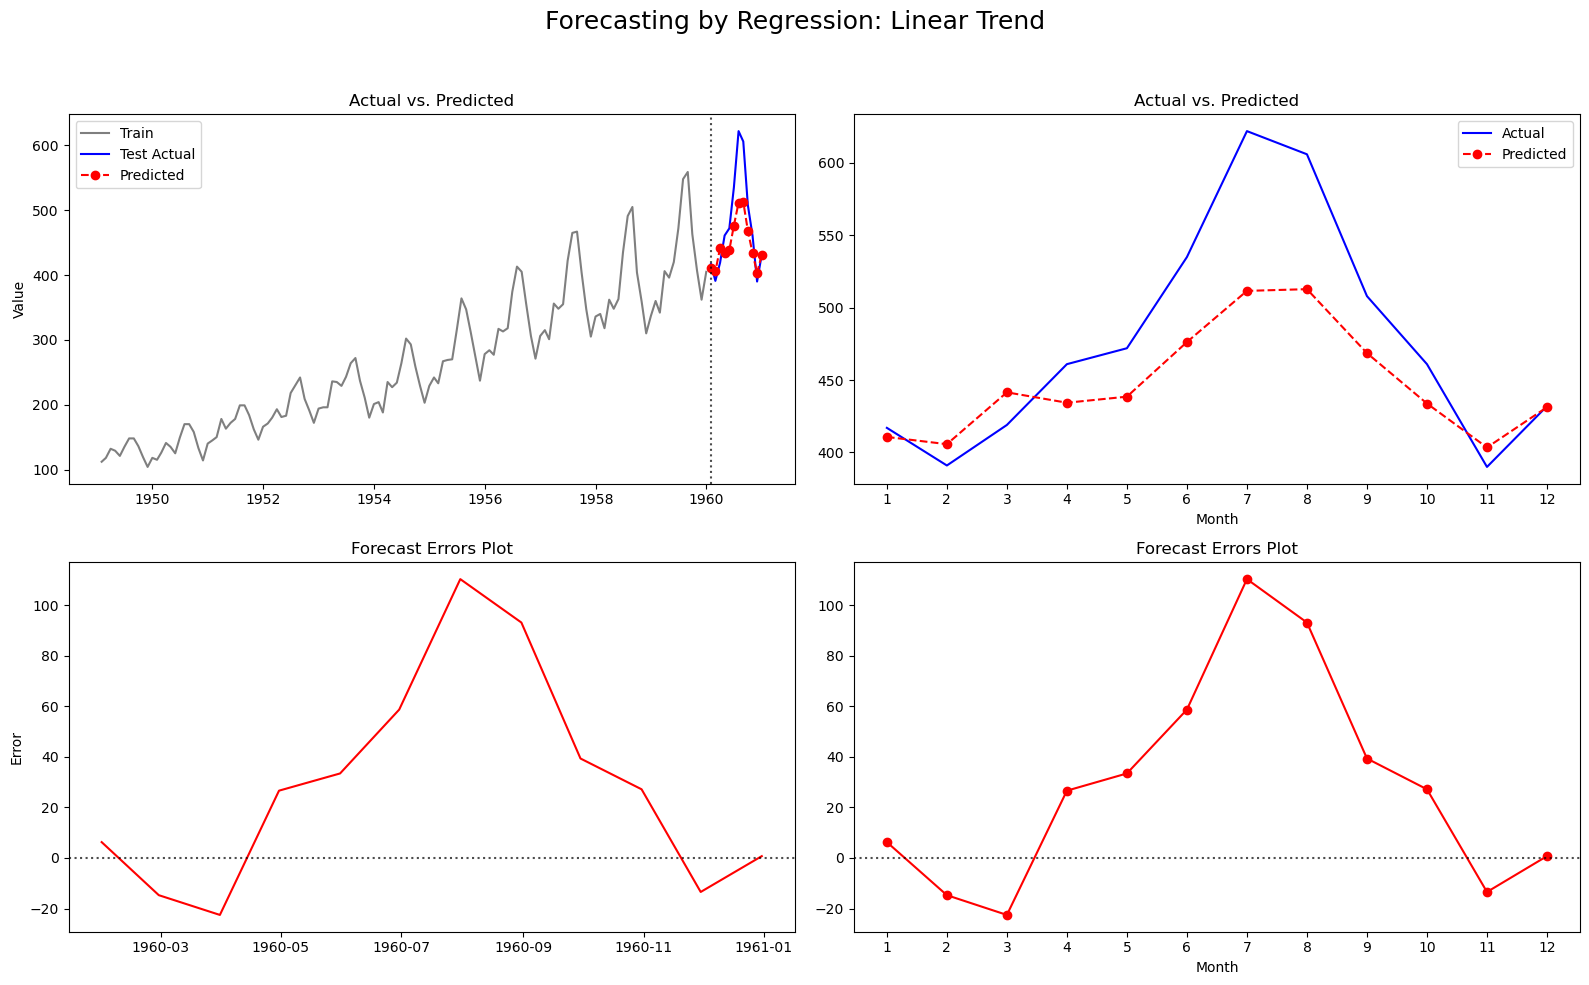

In [609]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Actual vs Predicted (over time)
axs[0, 0].plot(train.index, train, label='Train', color='black', alpha=0.5)
axs[0, 0].plot(test.index, y_test, label='Test Actual', color='blue')
axs[0, 0].plot(test.index, lr_pred, label='Predicted', color='red', linestyle='--', marker='o')
axs[0, 0].axvline(test.index[0], color='k', linestyle=':', alpha=0.7)
axs[0, 0].set_title('Actual vs. Predicted')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Actual vs Predicted (by month)
axs[0, 1].plot(range(1, 13), y_test.values, label='Actual', color='blue')
axs[0, 1].plot(range(1, 13), lr_pred, label='Predicted', color='red', linestyle='--', marker='o')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_title('Actual vs. Predicted')
axs[0, 1].legend()

# Forecast Errors (over time)
axs[1, 0].plot(test.index, errors, color='red')
axs[1, 0].axhline(0, color='k', linestyle=':', alpha=0.7)
axs[1, 0].set_title('Forecast Errors Plot')
axs[1, 0].set_ylabel('Error')

# Forecast Errors (by month)
axs[1, 1].plot(range(1, 13), errors, color='red', marker='o')
axs[1, 1].axhline(0, color='k', linestyle=':', alpha=0.7)
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_title('Forecast Errors Plot')

plt.suptitle('Forecasting by Regression: Linear Trend', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [611]:
#coefficient, summary table, and RMSE values
from sklearn.metrics import mean_squared_error

print(f"Coefficients\nintercept (b0): {intercept:.3f}\ntrend (b1): {trend_coef:.3f}\n")
print(summary_table)
print(f"\nRMSE = {rmse:.3f}")

Coefficients
intercept (b0): 4.813
trend (b1): 0.010

    Actual   Predicted       Error
0      417  410.722727    6.277273
1      391  405.722727  -14.722727
2      419  441.540909  -22.540909
3      461  434.359091   26.640909
4      472  438.540909   33.459091
5      535  476.268182   58.731818
6      622  511.631818  110.368182
7      606  512.813636   93.186364
8      508  468.631818   39.368182
9      461  433.813636   27.186364
10     390  403.450000  -13.450000
11     432  431.268182    0.731818

RMSE = 49.479


##### Model 2: Exponential Trend

In [614]:
airpass['Month'] = pd.date_range(start='1949-01', periods=len(airpass), freq='ME')
airpass.set_index('Month', inplace=True)

# Hold out last year for testing
train = airpass[airpass.index.year < 1960]['AirPassengers']
test = airpass[airpass.index.year == 1960]['AirPassengers']

In [616]:
train_df = train.reset_index()
test_df = test.reset_index()
train_df['trend'] = np.arange(len(train_df))
test_df['trend'] = np.arange(len(train_df), len(train_df) + len(test_df))

In [618]:
X_train = train_df[['trend']]
X_test = test_df[['trend']]

y_train_log = np.log(train_df['AirPassengers'])
y_test = test_df['AirPassengers']

In [620]:
#fit the exponential model
exp_lr = LinearRegression()
exp_lr.fit(X_train, y_train_log)

#predict
exp_pred_log = exp_lr.predict(X_test)
exp_pred = np.exp(y_pred_log)

In [622]:
intercept_bo_exp = exp_lr.intercept_
trend_coef_b1_exp = exp_lr.coef_[0]

# Error metrics
errors = y_test - y_pred
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Prepare a summary table
summary_table = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': errors
})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


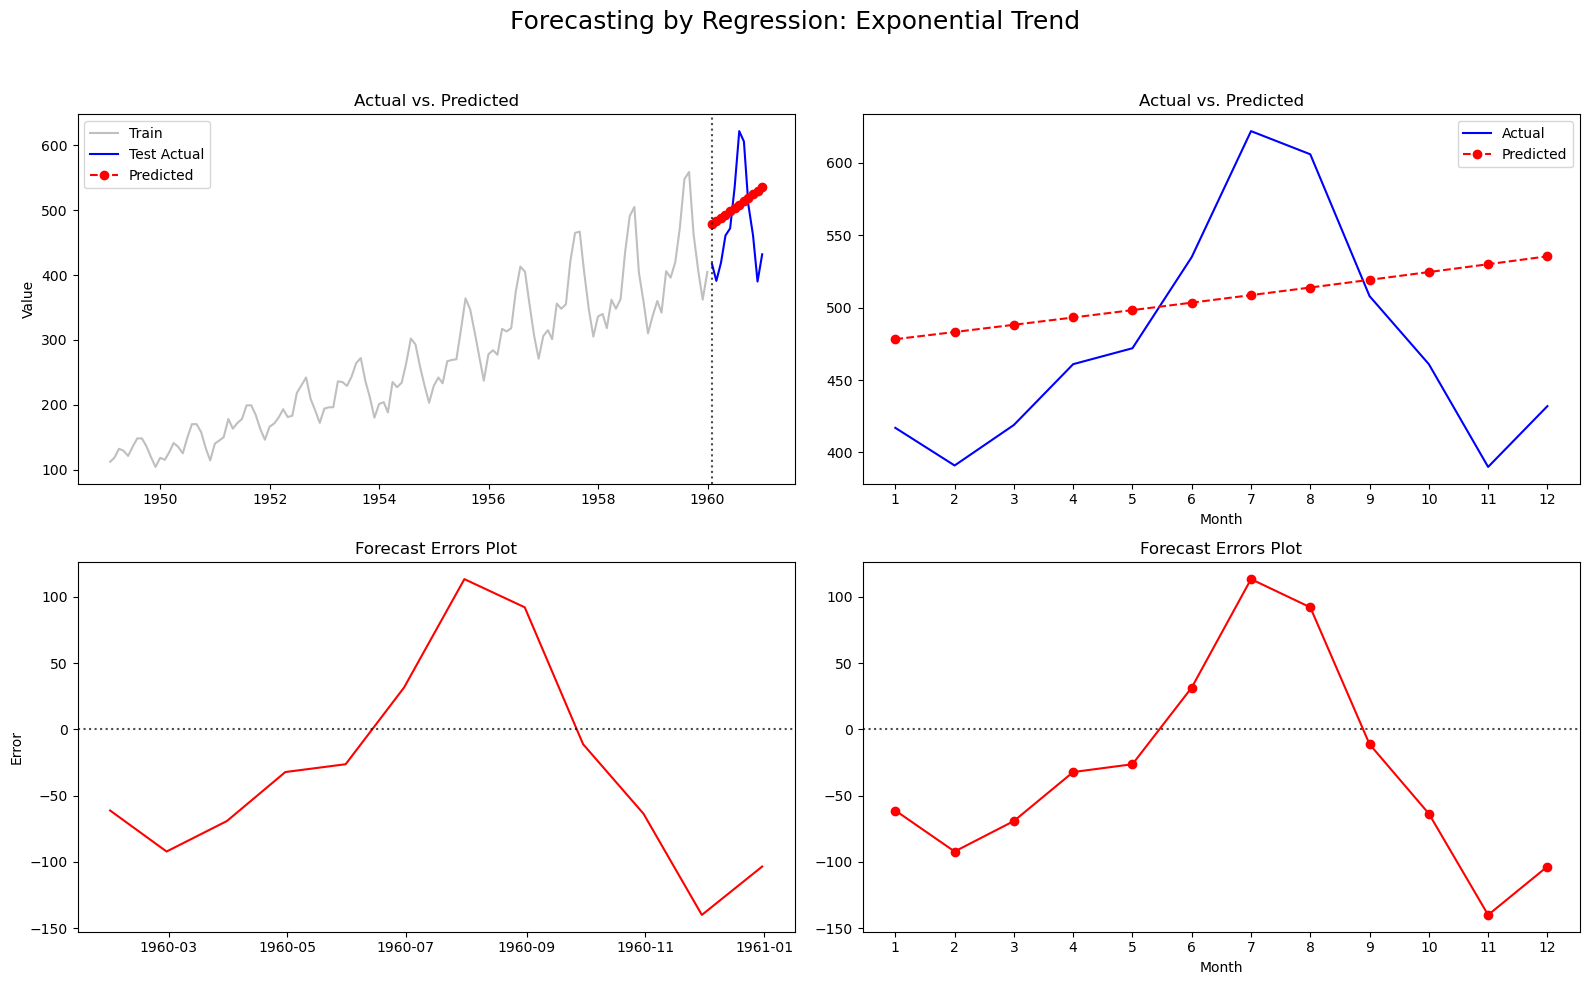

In [624]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Actual vs Predicted (over time)
axs[0, 0].plot(train_df['Month'], train_df['AirPassengers'], label='Train', color='grey', alpha=0.5)
axs[0, 0].plot(test_df['Month'], y_test, label='Test Actual', color='blue')
axs[0, 0].plot(test_df['Month'], y_pred, label='Predicted', color='red', linestyle='--', marker='o')
axs[0, 0].axvline(test_df['Month'].iloc[0], color='k', linestyle=':', alpha=0.7)
axs[0, 0].set_title('Actual vs. Predicted')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Actual vs Predicted (by month)
axs[0, 1].plot(range(1, 13), y_test.values, label='Actual', color='blue')
axs[0, 1].plot(range(1, 13), y_pred, label='Predicted', color='red', linestyle='--', marker='o')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_title('Actual vs. Predicted')
axs[0, 1].legend()

# Forecast Errors (over time)
axs[1, 0].plot(test_df['Month'], errors, color='red')
axs[1, 0].axhline(0, color='k', linestyle=':', alpha=0.7)
axs[1, 0].set_title('Forecast Errors Plot')
axs[1, 0].set_ylabel('Error')

# Forecast Errors (by month)
axs[1, 1].plot(range(1, 13), errors, color='red', marker='o')
axs[1, 1].axhline(0, color='k', linestyle=':', alpha=0.7)
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_title('Forecast Errors Plot')

plt.suptitle('Forecasting by Regression: Exponential Trend', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [626]:
print(f"Coefficients\nintercept: {intercept:.3f}\ntrend: {trend_coef:.3f}\n")
print(summary_table)
print(f"\nRMSE = {rmse:.3f}")

Coefficients
intercept: 4.813
trend: 0.010

    Actual   Predicted       Error
0      417  478.266316  -61.266316
1      391  483.208336  -92.208336
2      419  488.201424  -69.201424
3      461  493.246106  -32.246106
4      472  498.342916  -26.342916
5      535  503.492392   31.507608
6      622  508.695078  113.304922
7      606  513.951525   92.048475
8      508  519.262288  -11.262288
9      461  524.627928  -63.627928
10     390  530.049013 -140.049013
11     432  535.526114 -103.526114

RMSE = 79.367
